In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./Admission Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
del data['Serial No.']
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
for i in range(0,500):
  if(data['Admission'][i]>0.72):
    data['Admission'][i] = 1
  else:
    data['Admission'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [5]:
data['Admission'] = data['Admission'].astype(np.int32)

In [6]:
data['Admission'].value_counts()

0    252
1    248
Name: Admission, dtype: int64

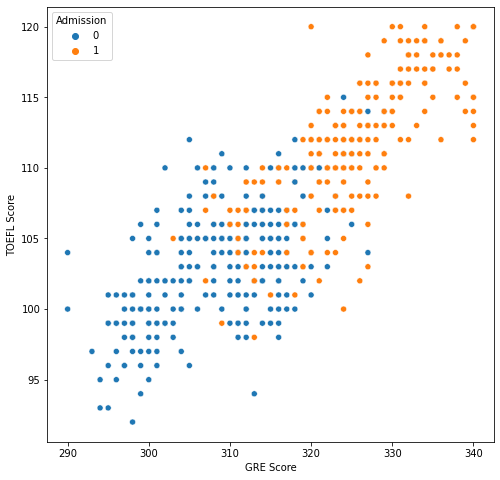

In [7]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=data,x='GRE Score',y='TOEFL Score',hue='Admission')
# High GRE and TOEFL Score means very high chance of admission

In [8]:
data['University Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

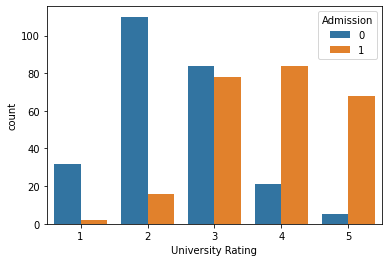

In [9]:
sns.countplot(data=data,x='University Rating',hue='Admission')
# Therefore can be easily seen it is very tough to get into Universities with Rating 1 or 2

In [10]:
data['LOR'] = data['LOR ']
del data['LOR ']

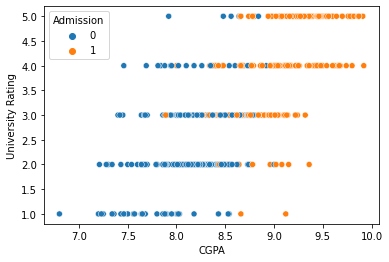

In [11]:
sns.scatterplot(data=data,x='CGPA',y='University Rating',hue='Admission')

In [12]:
# Model Building
X = data.iloc[:,data.columns!='Admission']
y = data['Admission']

In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [15]:
clf = Sequential()

In [16]:
clf.add(Dense(units = 20, kernel_initializer = 'he_uniform',activation='relu',input_dim = 7))

# clf.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))

# clf.add(Dense(units = 5, kernel_initializer = 'he_uniform',activation='relu'))

clf.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [17]:
clf.compile(optimizer='RMSprop',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
clf.fit(x_train, y_train, batch_size=5, epochs = 75)

Epoch 1/75
75/75 [==============================] - 1s 1ms/step - loss: 3.7944 - accuracy: 0.5493
Epoch 2/75
75/75 [==============================] - 0s 1ms/step - loss: 0.9822 - accuracy: 0.5733
Epoch 3/75
75/75 [==============================] - 0s 1ms/step - loss: 0.9862 - accuracy: 0.5893
Epoch 4/75
75/75 [==============================] - 0s 1ms/step - loss: 0.8881 - accuracy: 0.6213
Epoch 5/75
75/75 [==============================] - 0s 1ms/step - loss: 0.9178 - accuracy: 0.6267
Epoch 6/75
75/75 [==============================] - 0s 2ms/step - loss: 0.8925 - accuracy: 0.6027
Epoch 7/75
75/75 [==============================] - 0s 2ms/step - loss: 0.8509 - accuracy: 0.5893
Epoch 8/75
75/75 [==============================] - 0s 2ms/step - loss: 0.9295 - accuracy: 0.6213
Epoch 9/75
75/75 [==============================] - 0s 2ms/step - loss: 0.8738 - accuracy: 0.6000
Epoch 10/75
75/75 [==============================] - 0s 2ms/step - loss: 0.8555 - accuracy: 0.6533
Epoch 11/75
75/75 [

In [19]:
y_pred = clf.predict(x_test).reshape(125,)

In [20]:
y_pred_true = []
for i in y_pred:
  if(i>0.72):
    y_pred_true.append(1)
  else:
    y_pred_true.append(0)

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [22]:
confusion_matrix(y_test,y_pred_true)

array([[51, 16],
       [ 9, 49]])

In [23]:
accuracy_score(y_test,y_pred_true)*100

80.0